In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.0',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.18.0'}

In [2]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_almaden') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_rochester') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q-ncsu', group='nc-state', p

In [3]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

In [4]:
from qiskit.transpiler import PassManagerConfig
from qiskit.transpiler.coupling import CouplingMap
from statistics import mean
from passmanager import level_3_with_contant_pure
from benchmark.suites.qpe import QPE

In [5]:
device = provider.get_backend('ibmq_rochester')
backend_monitor(device)
device

ibmq_rochester
Configuration
-------------
    n_qubits: 53
    operational: True
    status_msg: active
    pending_jobs: 134
    backend_version: 1.2.0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    credits_required: True
    description: 53 qubit device
    allow_object_storage: True
    sample_name: Hummingbird
    max_shots: 8192
    conditional: False
    open_pulse: False
    n_registers: 1
    allow_q_object: True
    url: None
    online_date: 2019-10-01T04:00:00+00:00
    memory: False
    backend_name: ibmq_rochester
    max_experiments: 75
    quantum_volume: 8
    coupling_map: [[0, 1], [0, 5], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 6], [5, 0], [5, 9], [6, 4], [6, 13], [7, 8], [7, 16], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [11, 17], [12, 11], [12, 13], [13, 6], [13, 12], [13, 14], [14, 13], [14, 15], [15, 14], [15, 18], [16, 7], [16, 19], [17, 11], [17, 23], [18, 15], 

<IBMQBackend('ibmq_rochester') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>

In [6]:
simulator = provider.get_backend('ibmq_qasm_simulator')

In [17]:
seed = 0
pmconfig = PassManagerConfig(
            initial_layout=None,
            basis_gates=['u1', 'u2', 'u3', 'cx', 'id'],
            coupling_map=CouplingMap(device.configuration().coupling_map),
            backend_properties=device.properties(),
            seed_transpiler=seed)

In [18]:
pm = level_3_with_contant_pure(pmconfig)

In [19]:
QCList = []
for i in range(3, 7):
    QCList.append(transpile(QPE(nbits = i),device, optimization_level = 3))
    QCList.append(pm.run(QPE(nbits = i)))

In [20]:
QCList[0].count_ops()

OrderedDict([('cx', 25),
             ('u2', 18),
             ('u1', 10),
             ('measure', 3),
             ('u3', 2),
             ('barrier', 1)])

In [21]:
QCList[1].count_ops()

OrderedDict([('cx', 18),
             ('u2', 16),
             ('u1', 7),
             ('u3', 5),
             ('measure', 3),
             ('barrier', 1)])

In [27]:
from qiskit.qobj.utils import MeasLevel, MeasReturnType
from qiskit.pulse import Schedule
from qiskit.exceptions import QiskitError

In [28]:
qobj = assemble(QCList,
            qobj_id=None, qobj_header=None,
            shots=8192,
            memory=False, max_credits=10, seed_simulator=None,
            default_qubit_los=None, default_meas_los=None,  # schedule run options
            schedule_los=None, meas_level=MeasLevel.CLASSIFIED,
            meas_return=MeasReturnType.AVERAGE,
            memory_slots=None, memory_slot_size=100, rep_time=None, parameter_binds=None,
            backend=device,
            )

In [29]:
job2 = device.run(qobj)
job_monitor(job2)
res2 = job2.result()

Job Status: job has successfully run


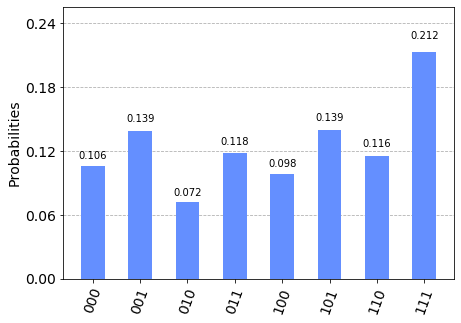

In [30]:
plot_histogram(res2.get_counts()[0])

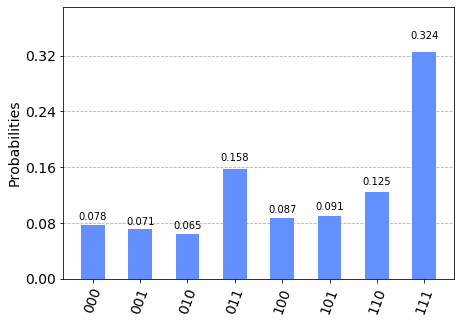

In [31]:
plot_histogram(res2.get_counts()[1])

In [34]:
plot_histogram(res2.get_counts()[0]).savefig('rochesterlevel3.pdf')

In [35]:
plot_histogram(res2.get_counts()[1]).savefig('rochesterour.pdf')

In [37]:
#level3 result
res2.get_counts()[0]

{'110': 948,
 '111': 1740,
 '010': 593,
 '000': 865,
 '001': 1137,
 '100': 803,
 '011': 965,
 '101': 1141}

In [38]:
#our result
res2.get_counts()[1]

{'110': 1026,
 '111': 2658,
 '010': 531,
 '000': 637,
 '001': 583,
 '100': 716,
 '011': 1296,
 '101': 745}